In [ ]:
import numpy as np
import pandas as pd

import os
for dirname, _, filenames in os.walk('../../data/titanic/raw/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

../../data/titanic/raw/test.csv
../../data/titanic/raw/titanic.zip
../../data/titanic/raw/train.csv
../../data/titanic/raw/gender_submission.csv


In [ ]:
train_df = pd.read_csv('../../data/titanic/raw/train.csv')
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
test_df = pd.read_csv('../../data/titanic/raw/test.csv')
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
women = train_df.loc[train_df.Sex == 'female']['Survived']
rate_w = sum(women) / len(women)
print(f'Female survival rate: {rate_w}')

Female survival rate: 0.7420382165605095


In [5]:
men = train_df.loc[train_df.Sex == 'male']['Survived']
rate_m = sum(men) / len(men)
print(f'Male survival rate: {rate_m}')

Male survival rate: 0.18890814558058924


In [ ]:
from sklearn.ensemble import RandomForestClassifier

y = train_df['Survived']

features = ['Pclass', 'Sex', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Age']
X = pd.get_dummies(train_df[features])
X_test = pd.get_dummies(test_df[features])

model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X, y)
predictions = model.predict(X_test)

output = pd.DataFrame({'PassengerId': test_df.PassengerId, 'Survived': predictions})
output.to_csv('../../data/titanic/processed/submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_val, y_train, y_val = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42,
    stratify=y
)

model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X_train, y_train)

val_predictions = model.predict(X_val)
print(f'Validation Accuracy: {accuracy_score(y_val, val_predictions)}')

Validation Accuracy: 0.8156424581005587


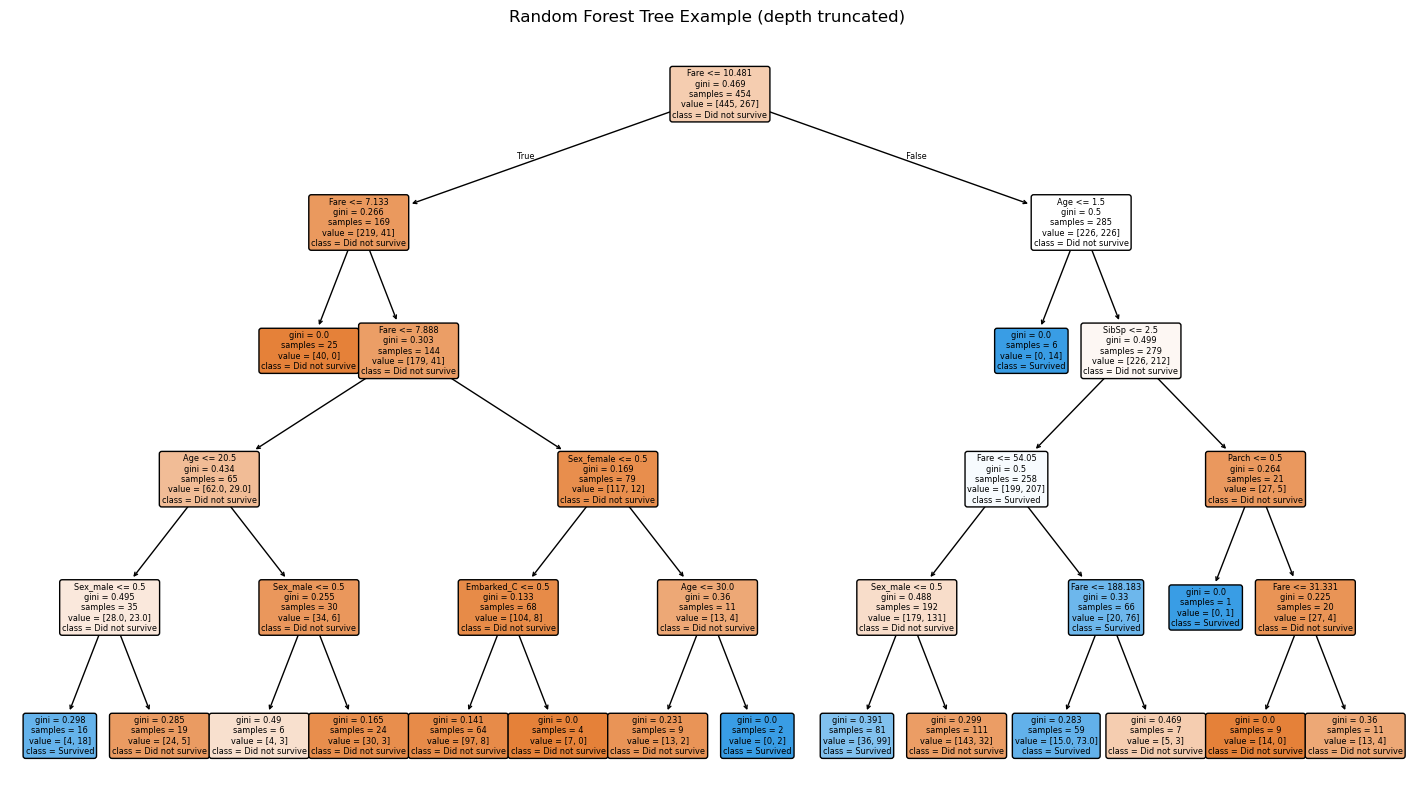

In [9]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(18, 10))
plot_tree(
    model.estimators_[0],
    feature_names=X.columns.tolist()    ,
    class_names=['Did not survive', 'Survived'],
    filled=True,
    rounded=True,
    max_depth=5
)
plt.title('Random Forest Tree Example (depth truncated)')
plt.show()